# audio(sound) detection using deep learning


dataset url= https://urbansounddataset.weebly.com/urbansound8k.html

## Importing libaries

In [1]:
!pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display

In [3]:
filename='D:\\UrbanSound8K\\35800-6-0-0.wav'

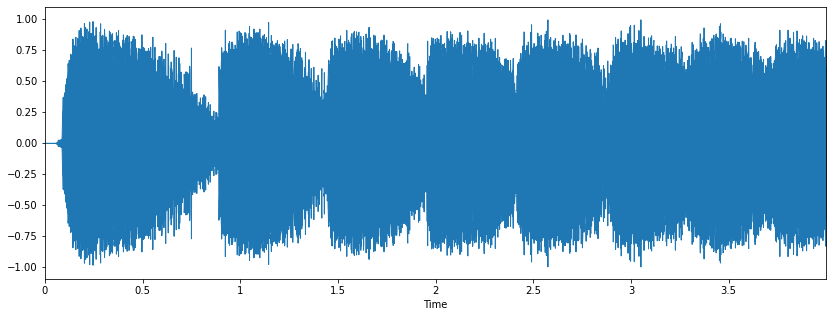

In [4]:

### gun Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

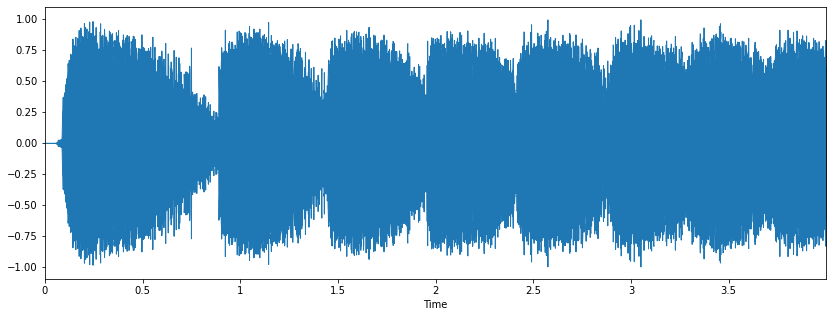

In [5]:

### Sound
filename1='D:\\UrbanSound8K\\50223-3-0-1.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename1)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[-3459, -3459],
       [-3841, -3841],
       [-4152, -4152],
       ...,
       [ 1874,  1874],
       [ 2288,  2288],
       [ 2858,  2858]], dtype=int16)

In [10]:
data

array([ 7.8933263e-06, -7.9187776e-06,  7.5512958e-06, ...,
        5.9580365e-03,  3.4335557e-02,  3.0645573e-01], dtype=float32)

In [11]:

import pandas as pd

metadata=pd.read_csv('D:\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [12]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()


air_conditioner     1000
dog_bark            1000
street_music        1000
drilling            1000
children_playing    1000
jackhammer          1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

### Audio Classification Data Preprocessing

In [13]:

### Let's read a sample audio using librosa
import librosa
audio_file_path='D:\\UrbanSound8K\\50223-3-0-1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
print(librosa_audio_data)

[-0.07997712 -0.13475317 -0.13348924 ...  0.05127652  0.04690772
  0.07646716]


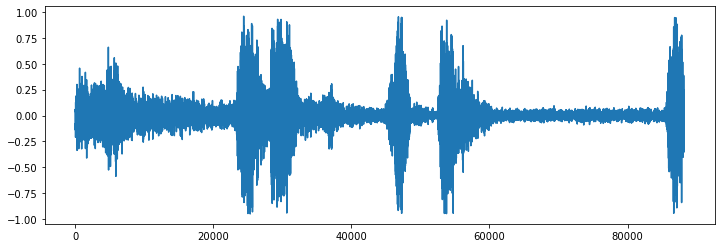

In [15]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Observation

Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [16]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [17]:
wave_audio

array([[-3459, -3459],
       [-3841, -3841],
       [-4152, -4152],
       ...,
       [ 1874,  1874],
       [ 2288,  2288],
       [ 2858,  2858]], dtype=int16)

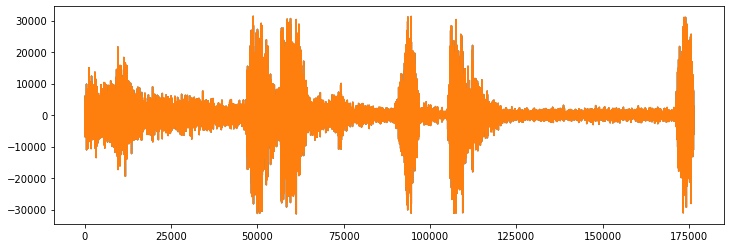

In [18]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [19]:

mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [20]:
mfccs

array([[-141.95999  , -154.01048  , -157.8707   , ..., -103.10656  ,
        -129.08104  , -136.26263  ],
       [ 186.06598  ,  212.5932   ,  219.53784  , ...,  187.22049  ,
         186.56929  ,  167.59586  ],
       [ -39.035904 ,  -53.78867  ,  -67.67482  , ..., -157.02574  ,
        -164.4978   , -150.40613  ],
       ...,
       [   2.1988354,    0.720925 ,    1.3469841, ...,  -11.362975 ,
          -9.773397 ,  -10.552237 ],
       [  -1.389524 ,   -5.786068 ,   -4.151964 , ...,   -9.201067 ,
          -9.237611 ,  -10.027061 ],
       [  -4.3423624,   -2.5721142,    1.1839457, ...,    4.1275163,
           1.2893078,   -1.9216741]], dtype=float32)

In [21]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='D:\\UrbanSound8K\\audio'
metadata=pd.read_csv('D:\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [22]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [23]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [07:46,  7.99it/s]C:\Users\yuvra\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [17:43, 11.69it/s]C:\Users\yuvra\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\yuvra\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [18:31,  7.85it/s]


In [24]:

### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [25]:

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [26]:
X.shape

(8732, 40)

In [27]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:

### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [29]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:

### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736603e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652133e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [32]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
X_train.shape

(6985, 40)

In [34]:

X_test.shape

(1747, 40)

In [35]:

y_train.shape

(6985, 10)

In [36]:

y_test.shape

(1747, 10)

### Model Creation

In [37]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [39]:
### No of classes
num_labels=y.shape[1]

In [40]:
model=Sequential()
###first layer
model.add(Dense(1024,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              41984     
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1

In [42]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [44]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
218/219 [============================>.] - ETA: 0s - loss: 0.1505 - accuracy: 0.9583
Epoch 00001: val_loss improved from inf to 0.47802, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 0.1503 - accuracy: 0.9583 - val_loss: 0.4780 - val_accuracy: 0.9302
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9715
Epoch 00002: val_loss did not improve from 0.47802
219/219 [==============================] - 3s 12ms/step - loss: 0.0888 - accuracy: 0.9715 - val_loss: 0.4827 - val_accuracy: 0.9227
Epoch 3/100
217/219 [============================>.] - ETA: 0s - loss: 0.1193 - accuracy: 0.9637
Epoch 00003: val_loss improved from 0.47802 to 0.44251, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 12ms/step - loss: 0.1196 - accuracy: 0.9638 - val_loss: 0.4425 - val_accuracy: 0.9250
Epoch 4/100
218/219 [=======================

218/219 [============================>.] - ETA: 0s - loss: 0.1260 - accuracy: 0.9660
Epoch 00029: val_loss did not improve from 0.41115
219/219 [==============================] - 3s 12ms/step - loss: 0.1258 - accuracy: 0.9661 - val_loss: 0.5101 - val_accuracy: 0.9256
Epoch 30/100
215/219 [============================>.] - ETA: 0s - loss: 0.1314 - accuracy: 0.9656
Epoch 00030: val_loss did not improve from 0.41115
219/219 [==============================] - 3s 12ms/step - loss: 0.1331 - accuracy: 0.9658 - val_loss: 0.5447 - val_accuracy: 0.9227
Epoch 31/100
218/219 [============================>.] - ETA: 0s - loss: 0.1205 - accuracy: 0.9679
Epoch 00031: val_loss did not improve from 0.41115
219/219 [==============================] - 3s 12ms/step - loss: 0.1204 - accuracy: 0.9679 - val_loss: 0.5147 - val_accuracy: 0.9290
Epoch 32/100
217/219 [============================>.] - ETA: 0s - loss: 0.1068 - accuracy: 0.9718
Epoch 00032: val_loss did not improve from 0.41115
219/219 [============

218/219 [============================>.] - ETA: 0s - loss: 0.1113 - accuracy: 0.9702
Epoch 00058: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 8ms/step - loss: 0.1112 - accuracy: 0.9702 - val_loss: 0.4849 - val_accuracy: 0.9370
Epoch 59/100
217/219 [============================>.] - ETA: 0s - loss: 0.0927 - accuracy: 0.9738
Epoch 00059: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 7ms/step - loss: 0.0928 - accuracy: 0.9737 - val_loss: 0.5010 - val_accuracy: 0.9353
Epoch 60/100
217/219 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9749
Epoch 00060: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 8ms/step - loss: 0.1048 - accuracy: 0.9749 - val_loss: 0.5127 - val_accuracy: 0.9267
Epoch 61/100
217/219 [============================>.] - ETA: 0s - loss: 0.0950 - accuracy: 0.9729
Epoch 00061: val_loss did not improve from 0.41115
219/219 [===============

214/219 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 0.9750
Epoch 00087: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 8ms/step - loss: 0.0982 - accuracy: 0.9749 - val_loss: 0.5818 - val_accuracy: 0.9227
Epoch 88/100
215/219 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9741
Epoch 00088: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 8ms/step - loss: 0.1054 - accuracy: 0.9744 - val_loss: 0.4677 - val_accuracy: 0.9330
Epoch 89/100
215/219 [============================>.] - ETA: 0s - loss: 0.0866 - accuracy: 0.9775
Epoch 00089: val_loss did not improve from 0.41115
219/219 [==============================] - 2s 8ms/step - loss: 0.0861 - accuracy: 0.9777 - val_loss: 0.4898 - val_accuracy: 0.9296
Epoch 90/100
213/219 [============================>.] - ETA: 0s - loss: 0.0835 - accuracy: 0.9770
Epoch 00090: val_loss did not improve from 0.41115
219/219 [===============

In [45]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9204350113868713


In [46]:
X_test[1]


array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.74158096,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798916 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.91695195,  -18.795404  ,   -5.001721  ,
         -0.7015264 ,    2.91399   ,   -6.7105994 ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529794,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.419801  ,   -0.5791613 ,
         -1.2440349 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [47]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

### Testing Some Test Audio Data

##### Steps

 Preprocess the new audio data
 
 predict the classes
 
 Invere transform your Predicted Label

In [48]:
filename='D:\\UrbanSound8K\\35800-6-0-0.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[ 1.2299162e+00  9.1741226e+01 -1.4049011e+02 -1.9246687e-01
 -1.0063380e+02 -1.4120851e+01 -6.5272728e+01 -8.3278263e-01
 -3.4428196e+01 -2.6001275e+00 -1.7391584e+01 -1.8619205e+00
 -1.4820714e+00 -2.9139712e+00  4.7969546e+00 -3.3683023e+00
  6.1319065e+00 -3.9245474e+00  4.1805754e+00 -3.0985584e+00
  9.5266920e-01  4.9848169e-02 -1.4383347e+00  3.5052198e-01
 -3.4499786e+00  4.5295038e+00 -1.6527750e+00  5.5396762e+00
  7.9428482e-01  7.2252016e+00  1.8818263e+00  3.5534992e+00
  9.0690452e-01  1.5560366e+00  2.6942425e+00  3.9603543e-01
  2.2419124e+00 -3.2185285e+00  9.7574240e-01 -4.2209473e+00]
[[ 1.2299162e+00  9.1741226e+01 -1.4049011e+02 -1.9246687e-01
  -1.0063380e+02 -1.4120851e+01 -6.5272728e+01 -8.3278263e-01
  -3.4428196e+01 -2.6001275e+00 -1.7391584e+01 -1.8619205e+00
  -1.4820714e+00 -2.9139712e+00  4.7969546e+00 -3.3683023e+00
   6.1319065e+00 -3.9245474e+00  4.1805754e+00 -3.0985584e+00
   9.5266920e-01  4.9848169e-02 -1.4383347e+00  3.5052198e-01
  -3.4499786e+00 

array(['gun_shot'], dtype='<U16')